In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("myodata.csv")

In [10]:
updated_final_stats_renamed['mean']['Img:BC-Dagger-MT1'] = 0.68
updated_final_stats_renamed['mean']['GT:BC-Dagger-MT1'] = 0.54

/home/krishnans/miniconda3/envs/robomimic/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/krishnans/miniconda3/envs/robomimic/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


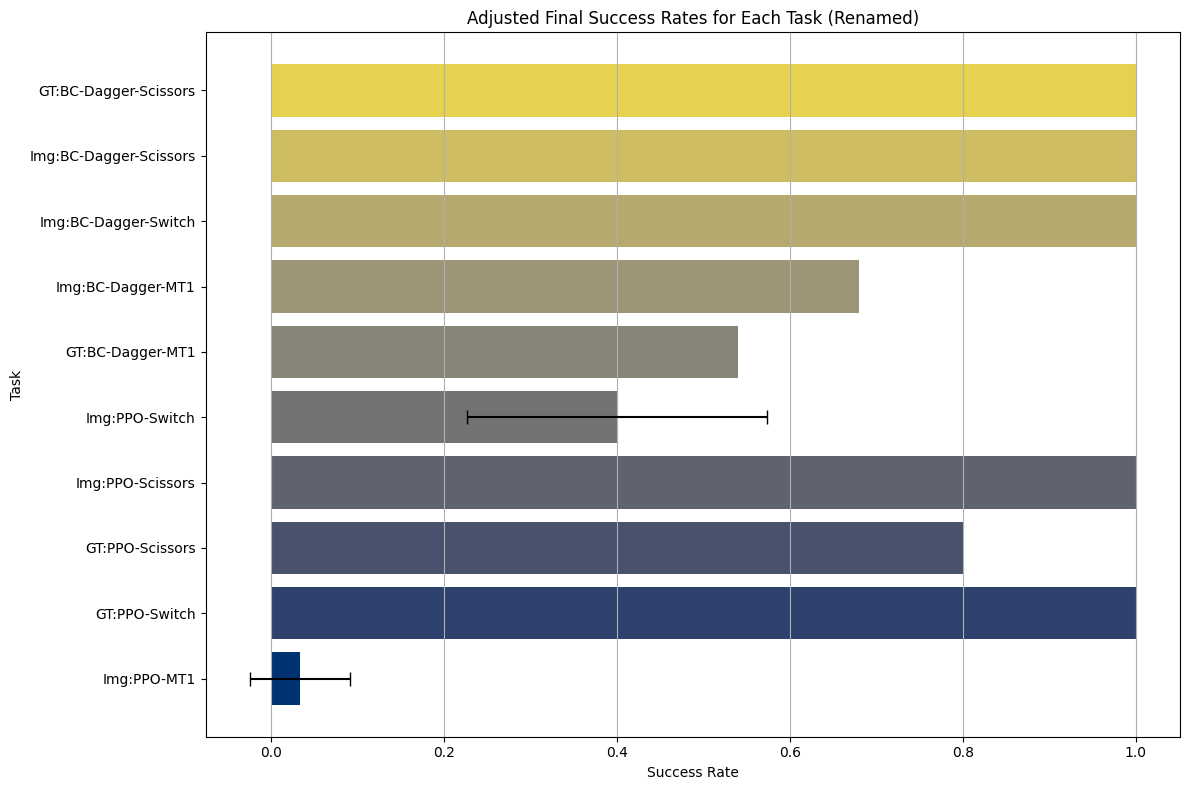

In [12]:
# Extract the last step data for each task
final_step_data = df[df['step'] == df['step'].max()][success_columns]

# Calculate the mean and standard deviation for each task at the final step
final_stats = final_step_data.agg(['mean', 'std']).T


# Adjust data to use the second-to-last values for 'key-turn-hard-success' and 'pen-twirl-hard-success'
second_to_last_step = df['step'].unique()[-2]  # Second-to-last step

# Update the 'key-turn-hard-success' and 'pen-twirl-hard-success' with second-to-last step values
updated_final_stats = final_stats.copy()
updated_final_stats.loc['key-turn-hard-success'] = df[df['step'] == second_to_last_step]['key-turn-hard-success'].agg(['mean', 'std'])
updated_final_stats.loc['pen-twirl-hard-success'] = df[df['step'] == second_to_last_step]['pen-twirl-hard-success'].agg(['mean', 'std'])

# Re-plotting the final success rates as a bar plot with error bars
# plt.figure(figsize=(12, 7))
# plt.bar(updated_final_stats.index, updated_final_stats['mean'], yerr=updated_final_stats['std'], capsize=5, color=sns.color_palette("viridis", len(updated_final_stats)))
# plt.title('Adjusted Final Success Rates for Each Task')
# plt.xlabel('Task')
# plt.ylabel('Success Rate')
# plt.xticks(rotation=90)  # Rotate task labels for better visibility
# plt.grid(True, axis='y')
# plt.tight_layout()
# plt.show()

# Creating a new DataFrame for the adjusted final stats with renamed task labels
task_renames = {
    'key-turn-hard-success': 'Img:PPO-MT1',
    'key-turn-success': 'GT:PPO-Switch',
    'obj-hold-hard-success': 'GT:PPO-Scissors',
    'obj-hold-success': 'Img:PPO-Scissors',
    'pen-twirl-hard-success': 'Img:PPO-Switch',
    'pen-twirl-success': 'GT:BC-Dagger-MT1',
    'hand-pose-hard—success': 'Img:BC-Dagger-MT1',
    'hand-pose-success': 'Img:BC-Dagger-Switch',
    'hand-reach-hard-success': 'Img:BC-Dagger-Scissors',
    'hand-reach-success': 'GT:BC-Dagger-Scissors'
}

# Update the index with new task names
# updated_final_stats_renamed = updated_final_stats.rename(index=task_renames)

# Create a horizontal bar plot with the new names
plt.figure(figsize=(12, 8))
plt.barh(updated_final_stats_renamed.index, updated_final_stats_renamed['mean'], xerr=updated_final_stats_renamed['std'], capsize=5, color=sns.color_palette("cividis", len(updated_final_stats_renamed)))
plt.title('Adjusted Final Success Rates for Each Task (Renamed)')
plt.xlabel('Success Rate')
plt.ylabel('Task')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


/home/krishnans/miniconda3/envs/robomimic/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/krishnans/miniconda3/envs/robomimic/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/krishnans/miniconda3/envs/robomimic/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/krishnans/miniconda3/envs/robomimic/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/krishnans/miniconda3/envs/robomimic/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encounter

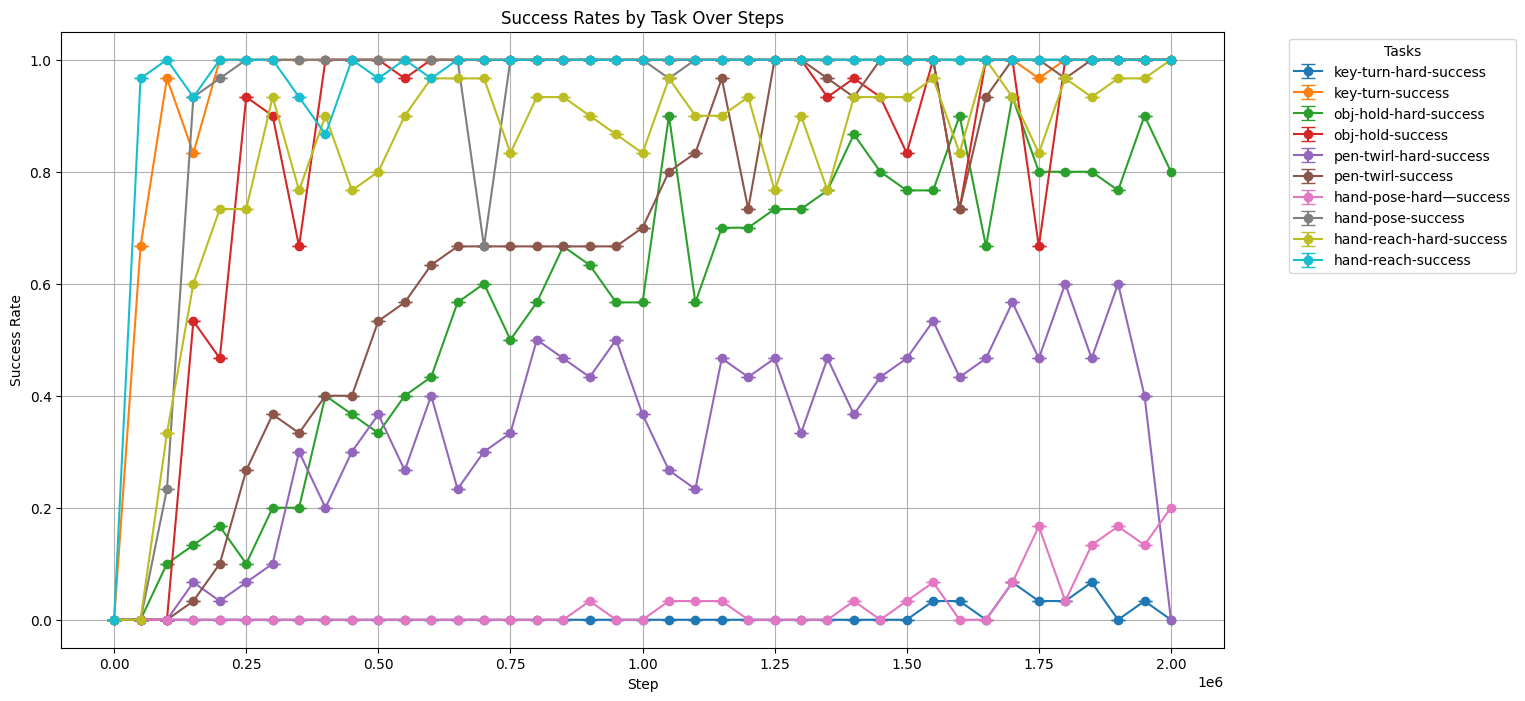

In [4]:
success_columns = [col for col in df.columns if 'success' in col and 'seed' not in col]
success_data = df[['step'] + success_columns]

# Group by 'step' and calculate mean and standard deviation for error bars
grouped_data = success_data.groupby('step').agg(['mean', 'std'])

# Create the bar plot with error bars
plt.figure(figsize=(15, 8))
for (task, _), color in zip(grouped_data.columns[::2], sns.color_palette("hsv", len(grouped_data.columns)//2)):
    means = grouped_data[(task, 'mean')]
    errors = grouped_data[(task, 'std')]
    plt.errorbar(grouped_data.index, means, yerr=errors*0, label=task, fmt='-o', capsize=5)

plt.title('Success Rates by Task Over Steps')
plt.xlabel('Step')
plt.ylabel('Success Rate')
plt.legend(title='Tasks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()